In [2]:
# !pip install pandas
# !pip install scikit-learn

In [3]:
# Import libraries and methods/functions
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Start your code here!

In [4]:
data = pd.read_csv('data.csv', sep=';')

In [5]:
print(data)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

In [6]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [7]:
print("Shape of the data:", data.shape)

Shape of the data: (4424, 37)


In [8]:
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                     

In [9]:
print("\nDataFrame information:")
print(data.info())


DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualific

In [10]:
print("\nSummary statistics for numerical columns:")
print(data.describe())


Summary statistics for numerical columns:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.

In [11]:
print(data.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

In [12]:
print(data.describe(include=['object']))

          Target
count       4424
unique         3
top     Graduate
freq        2209


In [13]:
data.isnull()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [15]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(data[['Nacionality']])

# Identify outliers
outliers = abs(z_scores) > 2

In [16]:
print(outliers)

      Nacionality
0           False
1           False
2           False
3           False
4           False
...           ...
4419        False
4420         True
4421        False
4422        False
4423         True

[4424 rows x 1 columns]


In [17]:
print(data.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [18]:
print(data['Gender'].unique())

[1 0]


In [19]:
print(data['Daytime/evening attendance\t'].unique())

[1 0]


In [20]:
print(data['Marital status'].unique())

[1 2 4 3 5 6]


In [21]:
print(data['Course'].unique()) 

[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]


In [22]:
print(data['Debtor'].unique()) 

[0 1]


In [23]:
print(data['Scholarship holder'].unique())

[0 1]


In [24]:
duplicates = data.duplicated()


In [25]:
print("Duplicate rows:")
print(data[duplicates])

Duplicate rows:
Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance	, Previous qualification, Previous qualification (grade), Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 37 columns]


In [26]:
print(data['Target'].unique())

['Dropout' 'Graduate' 'Enrolled']


# Coverting Numerical to categorial 

In [27]:
# # Manual mapping
data['Target'] = data['Target'].map({'Dropout': 1, 'Enrolled': 0, 'Graduate': 2})


In [28]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize LabelEncoder
# le = LabelEncoder()

# # Fit and transform the target variable
# data['Target'] = le.fit_transform(data['Target'])

# # Check the mapping
# print(dict(enumerate(le.classes_)))

In [29]:
print(data['Marital status'].unique())

[1 2 4 3 5 6]


In [30]:
print(data['Target'].unique())

[1 2 0]


In [31]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation with the target variable
print(correlation_matrix['Target'].sort_values(ascending=False))


Target                                            1.000000
Curricular units 2nd sem (approved)               0.409494
Curricular units 1st sem (approved)               0.353926
Curricular units 2nd sem (grade)                  0.271144
Curricular units 1st sem (grade)                  0.248314
Scholarship holder                                0.243547
Tuition fees up to date                           0.167016
Curricular units 2nd sem (enrolled)               0.150299
Curricular units 1st sem (enrolled)               0.134951
Admission grade                                   0.106058
Previous qualification (grade)                    0.098462
Application order                                 0.080020
Displaced                                         0.068827
Curricular units 2nd sem (credited)               0.065386
Curricular units 1st sem (credited)               0.058572
Unemployment rate                                 0.044128
Father's qualification                            0.0304

In [32]:
!pip install matplotlib seaborn


c:\Users\UNC-ROBOTIC\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\UNC-ROBOTIC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


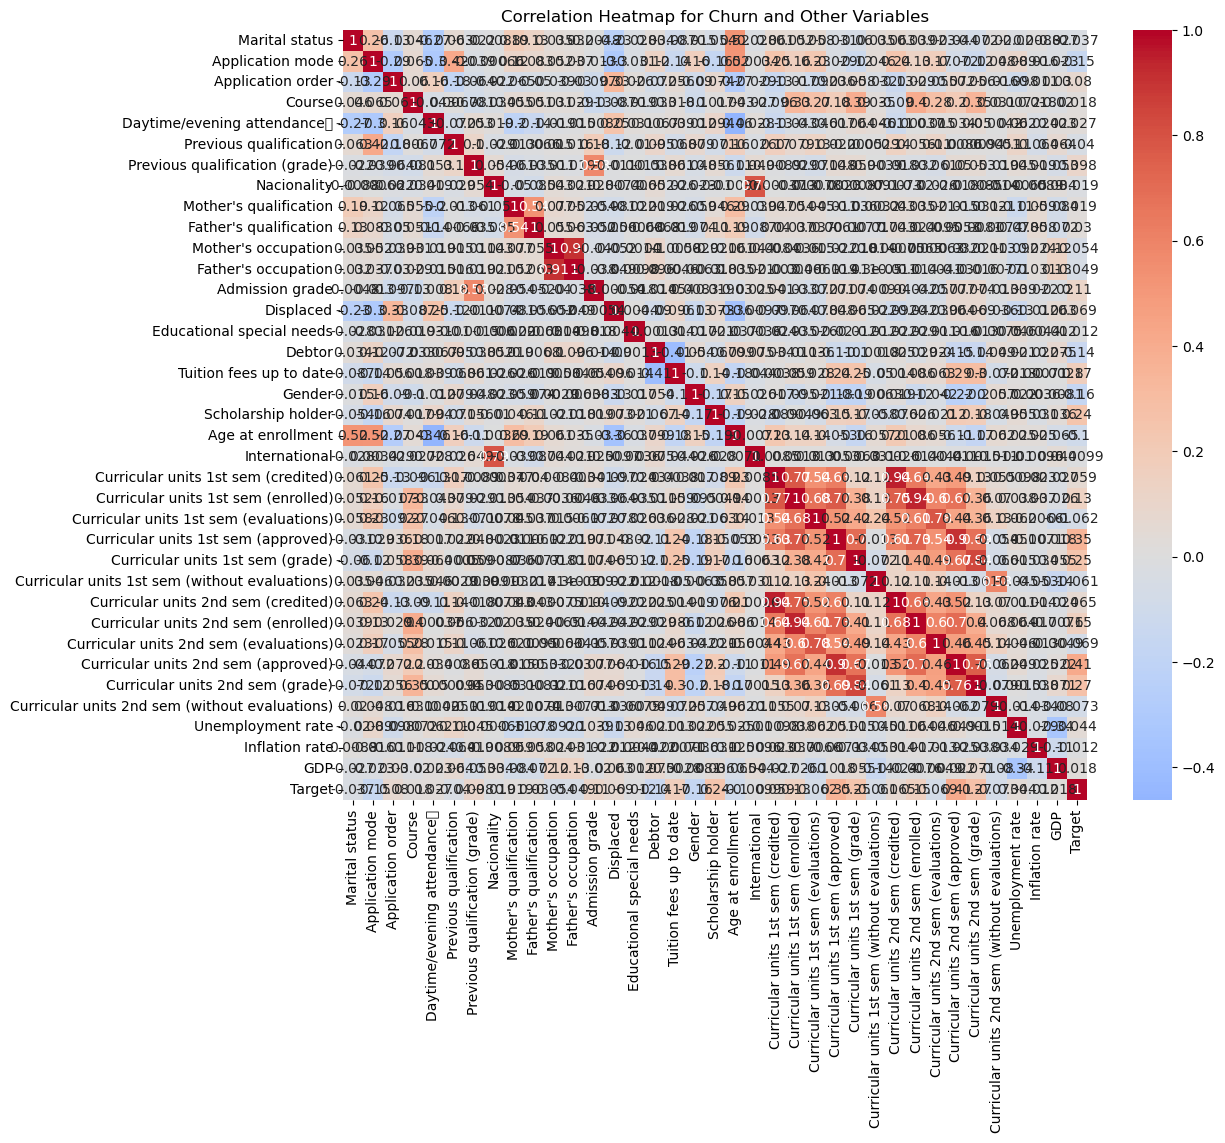

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas dataframe 'df' with all variables and the target
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Churn and Other Variables')
plt.show()


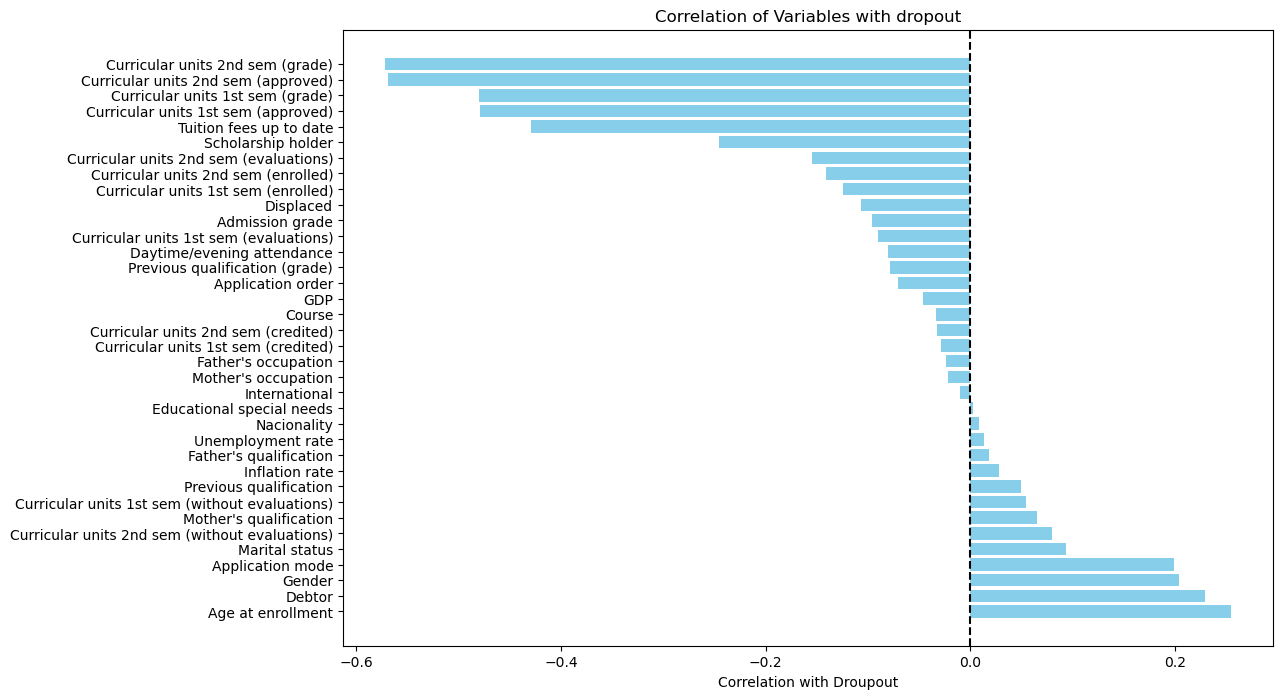

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for correlations (you can use your own correlation values)
correlations = {
    "Age at enrollment": 0.254215,
    "Debtor": 0.229407,
    "Gender": 0.203983,
    "Application mode": 0.198458,
    "Marital status": 0.093712,
    "Curricular units 2nd sem (without evaluations)": 0.079901,
    "Mother's qualification": 0.064958,
    "Curricular units 1st sem (without evaluations)": 0.054230,
    "Previous qualification": 0.049379,
    "Inflation rate": 0.027826,
    "Father's qualification": 0.018295,
    "Unemployment rate": 0.012980,
    "Nacionality": 0.008346,
    "Educational special needs": 0.002806,
    "International": -0.010360,
    "Mother's occupation": -0.021999,
    "Father's occupation": -0.024260,
    "Curricular units 1st sem (credited)": -0.029308,
    "Curricular units 2nd sem (credited)": -0.033038,
    "Course": -0.033676,
    "GDP": -0.046319,
    "Application order": -0.070485,
    "Previous qualification (grade)": -0.078208,
    "Daytime/evening attendance": -0.080499,
    "Curricular units 1st sem (evaluations)": -0.090125,
    "Admission grade": -0.095806,
    "Displaced": -0.107232,
    "Curricular units 1st sem (enrolled)": -0.124635,
    "Curricular units 2nd sem (enrolled)": -0.141515,
    "Curricular units 2nd sem (evaluations)": -0.154999,
    "Scholarship holder": -0.245354,
    "Tuition fees up to date": -0.429149,
    "Curricular units 1st sem (approved)": -0.479112,
    "Curricular units 1st sem (grade)": -0.480669,
    "Curricular units 2nd sem (approved)": -0.569500,
    "Curricular units 2nd sem (grade)": -0.571792
}


# Convert dictionary to a dataframe and sort by correlation value
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'Correlation']).sort_values(by='Correlation', ascending=False)

# Bar plot
plt.figure(figsize=(12, 8))
plt.barh(corr_df['Variable'], corr_df['Correlation'], color='skyblue')
plt.xlabel('Correlation with Droupout')
plt.title('Correlation of Variables with dropout')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()


In [35]:
print(data['GDP'].unique())

[ 1.74  0.79 -3.12 -0.92 -4.06  3.51 -1.7   2.02  0.32  1.79]


# Hypothesis Higher socio-economic status(GDP) correlates with lower dropout rates.

In the data, GDP has a weak negative correlation (-0.046319), suggesting that as GDP increases, there may be a slight decrease in the likelihood of the event being studied 

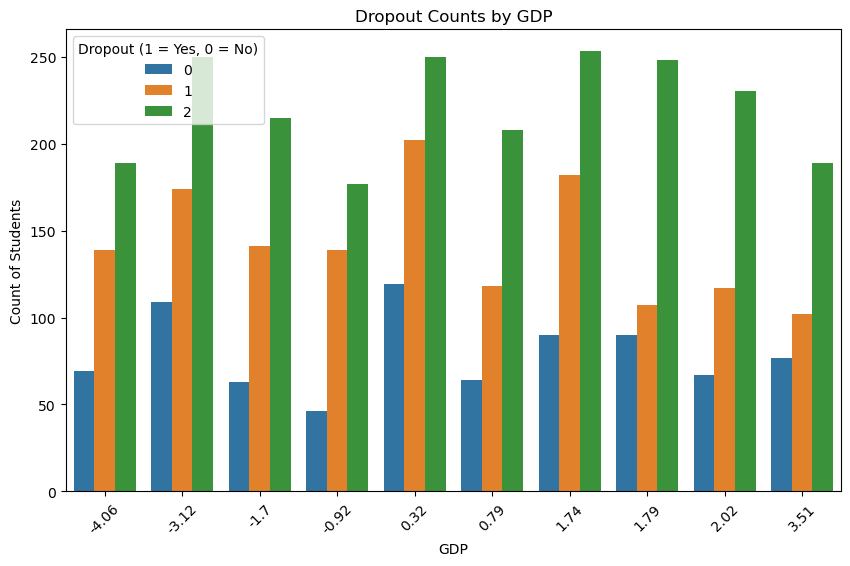

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by GDP and Target, and count the occurrences
gdp_dropout_counts = data.groupby(['GDP', 'Target']).size().reset_index(name='Count')

# Plot the counts
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP', y='Count', hue='Target', data=gdp_dropout_counts)
plt.title('Dropout Counts by GDP')
plt.xlabel('GDP')
plt.ylabel('Count of Students')
plt.xticks(rotation=45)
plt.legend(title='Dropout (1 = Yes, 0 = No)')
plt.show()


# Students with higher admission grades are less likely to drop out.

The hypothesis that students with higher admission grades are less likely to drop out is generally supported, though the correlation is relatively weak. Other factors may also be influencing dropout rates significantly

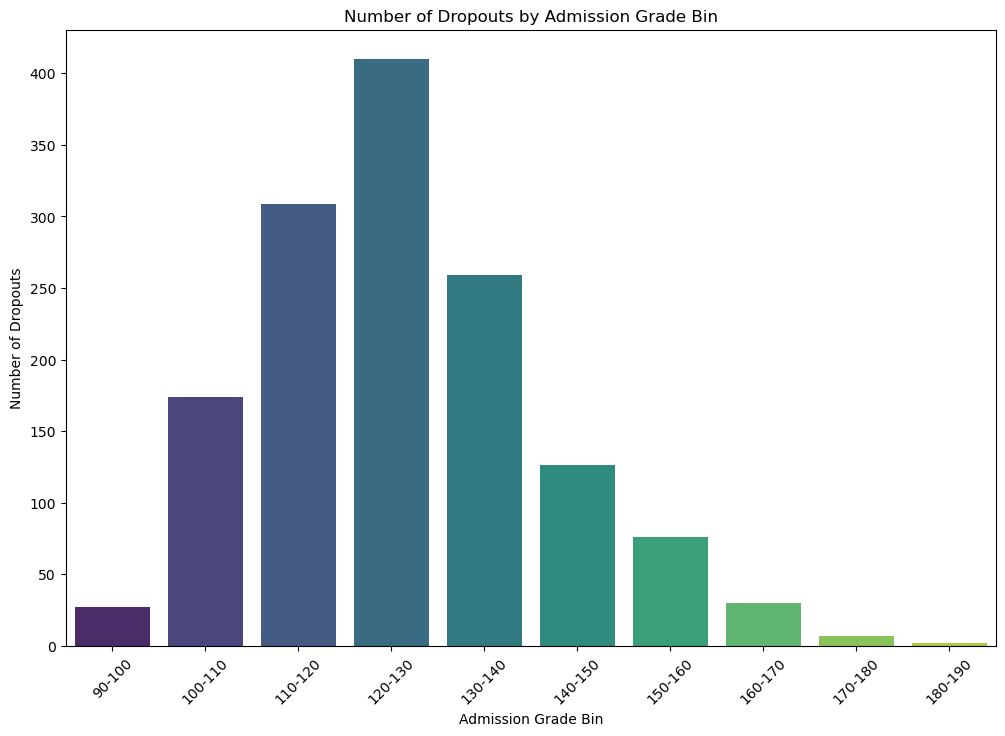

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins for the admission grades (adjust based on data distribution)
bins = [90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
labels = ['90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160-170', '170-180', '180-190']

# Create a new column for binned admission grades
data['Admission grade bin'] = pd.cut(data['Admission grade'], bins=bins, labels=labels, right=False)

# Create a new column for binned admission grades
data['Admission grade bin'] = pd.cut(data['Admission grade'], bins=bins, labels=labels, right=False)

# Group by the new binned column and dropout status, and count occurrences
admission_dropout_counts = data.groupby(['Admission grade bin', 'Target']).size().reset_index(name='Count')

# Filter to include only dropouts
dropout_data = admission_dropout_counts[admission_dropout_counts['Target'] == 1]

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Admission grade bin', y='Count', data=dropout_data, palette='viridis')
plt.title('Number of Dropouts by Admission Grade Bin')
plt.xlabel('Admission Grade Bin')
plt.ylabel('Number of Dropouts')
plt.xticks(rotation=45)
plt.show()


In [38]:
print(data['Admission grade'].unique())

[127.3 142.5 124.8 119.6 141.5 114.8 128.4 113.1 129.3 123.  130.6 119.3
 130.2 111.8 137.1 120.7 137.4 136.3 124.6 120.3 121.8 125.5 114.9 123.9
 157.  116.4 131.  122.1 118.8 150.  130.  138.8 134.5 131.4 102.5 128.8
 122.9 113.9 120.  121.1 120.4 100.6 121.4 109.7 134.1 127.6 132.4 133.4
 126.1 113.5 121.3 159.3 129.1 155.3 139.8 115.2 131.9 126.  120.9 128.2
 120.1 100.  134.  130.8 135.8 111.7 132.9 115.5 106.  117.  110.2 155.7
 180.4 110.  161.  117.6 128.7 112.2 100.8 105.  114.  137.  124.9 134.3
 111.5 160.  117.4 122.2 118.2 106.7 108.2 107.  136.1 115.3 140.4 113.4
 118.6 122.3 127.9 117.1 145.3 122.6 128.  123.7 131.7 133.2 109.3 113.
 157.9 112.1 174.7 110.1  99.7 121.  119.1 124.7 117.2 131.5 121.7 123.4
 132.8 108.7 138.1 126.5 127.4 123.6 122.  125.8 123.3 124.4 170.  121.5
 108.  132.3 148.  113.3 133.  140.  128.3 104.  135.  126.6 129.  162.3
 163.4 122.8 118.  129.8 152.  131.8 105.9 132.1 129.5 126.7 116.5 149.8
 115.1 124.5 136.  126.3 126.9 145.  115.8 147.  122

In [39]:
unique_values = data['Scholarship holder'].unique()
print(unique_values)

[0 1]


#  Dropout rates are lower among students receiving financial aid or scholarships..

Dropout rates are lower among students receiving financial aid or scholarships Based on the correlation value, the hypothesis "Dropout rates are lower among students receiving financial aid or scholarships" is supported, but the strength of this relationship is moderate.

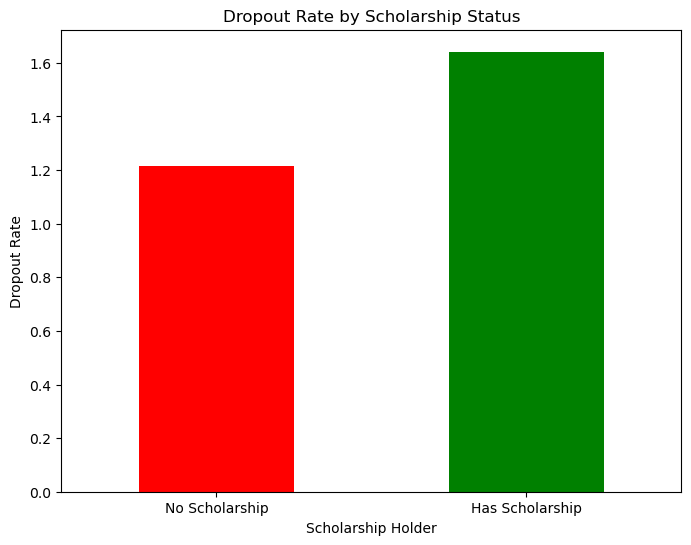

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate dropout rates
dropout_rates = data.groupby('Scholarship holder')['Target'].mean()

# Plot dropout rates
plt.figure(figsize=(8, 6))
dropout_rates.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Dropout Rate')
plt.title('Dropout Rate by Scholarship Status')
plt.xticks([0, 1], ['No Scholarship', 'Has Scholarship'], rotation=0)
plt.show()


In [41]:
from scipy.stats import ttest_ind

# Separate data based on scholarship holder status
dropout_with_scholarship = data[data['Scholarship holder'] == 1]['Target']
dropout_without_scholarship = data[data['Scholarship holder'] == 0]['Target']

# Perform t-test
t_stat, p_value = ttest_ind(dropout_with_scholarship, dropout_without_scholarship)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 16.698227310866578
P-value: 9.460784229197357e-61


# WEEK TWO

### Univariate Analysis

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
sns.set(style="whitegrid")

In [44]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [45]:
print(numerical_columns)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [46]:
print(categorical_columns)

['Admission grade bin']


In [47]:
# Summary statistics for numerical variables
numerical_summary = data[numerical_columns].describe()
print("Descriptive Statistics for Numerical Variables:")
print(numerical_summary)

Descriptive Statistics for Numerical Variables:
       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                     

C:\Users\UNC-ROBOTIC\AppData\Local\Temp\ipykernel_26300\570443279.py:4: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()


<Figure size 1800x1200 with 0 Axes>

c:\Users\UNC-ROBOTIC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


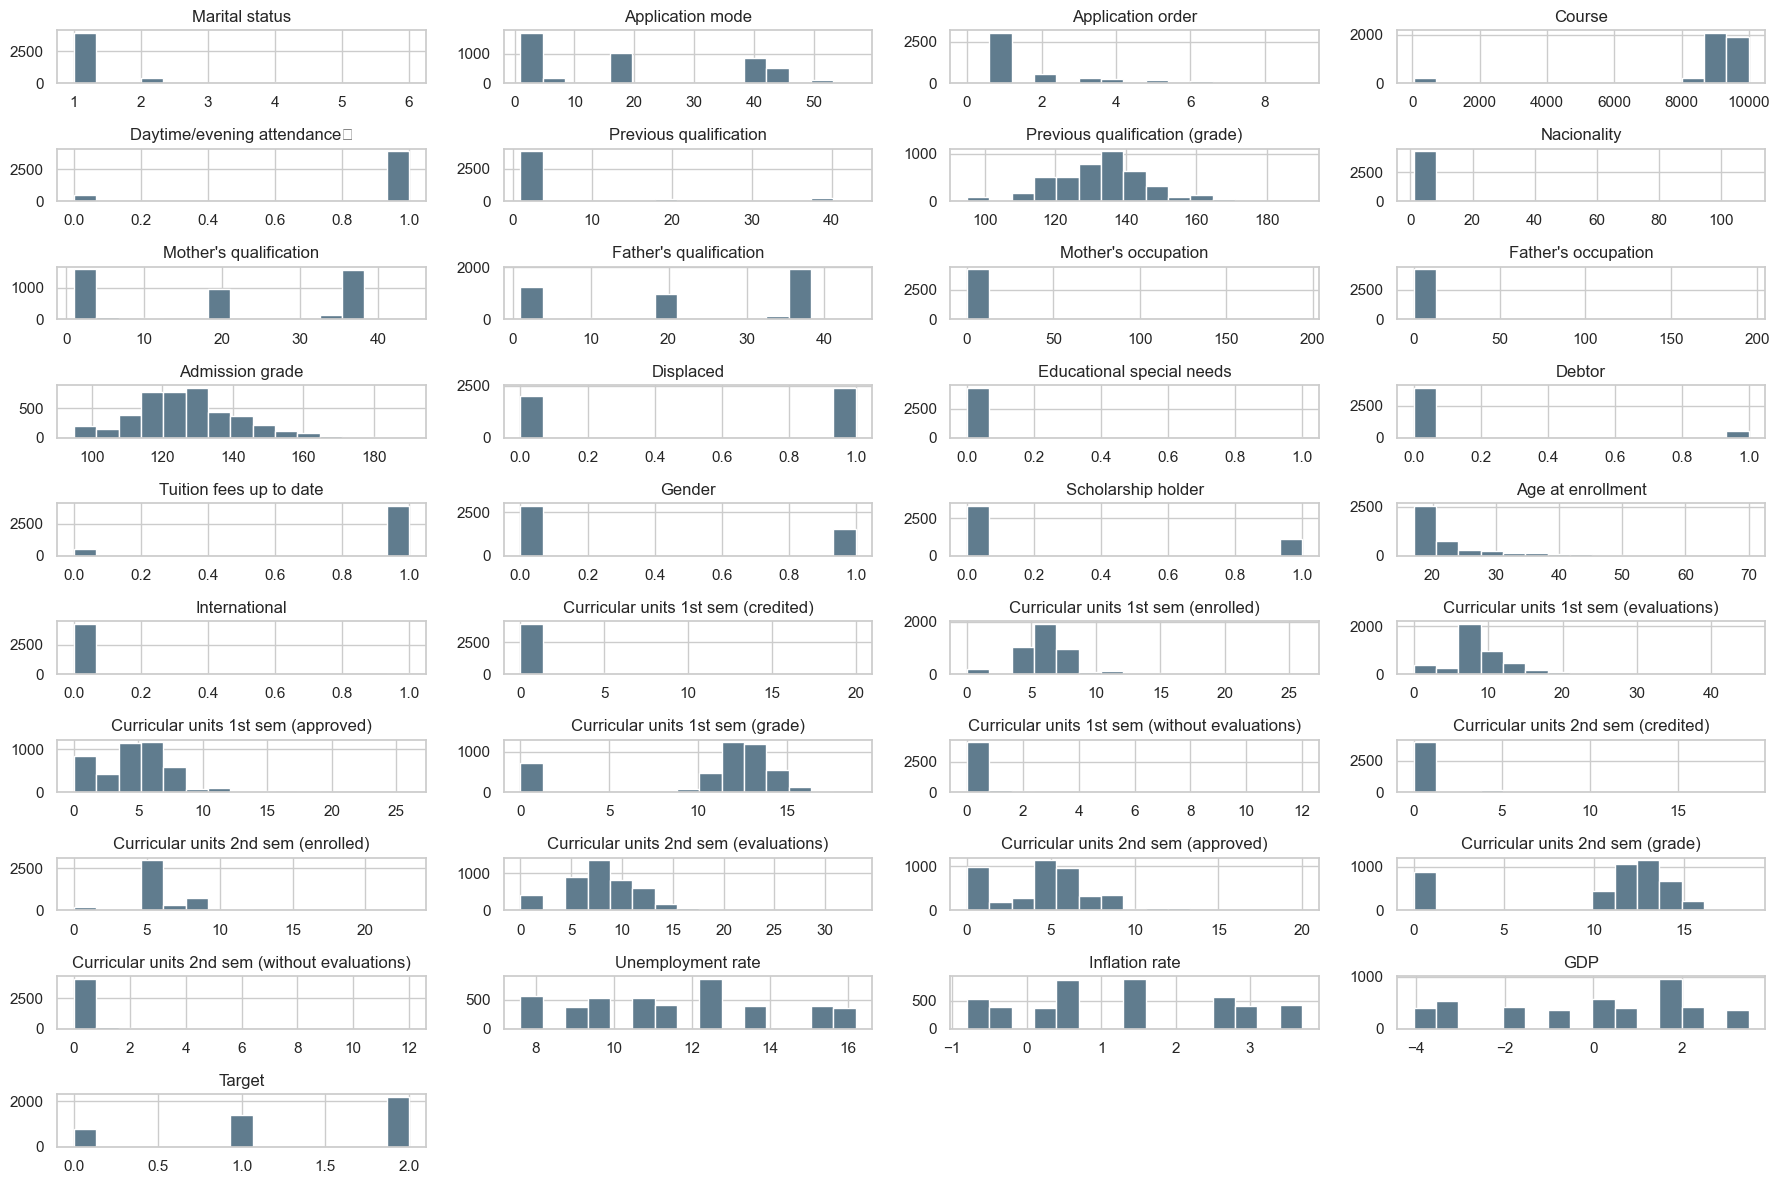

In [48]:
# Histograms for numerical variables
plt.figure(figsize=(18, 12))
data[numerical_columns].hist(bins=15, figsize=(18, 12), layout=(10, 4), color='#607c8e')
plt.tight_layout()
plt.show()

C:\Users\UNC-ROBOTIC\AppData\Local\Temp\ipykernel_26300\2309191260.py:4: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()


<Figure size 1800x1200 with 0 Axes>

c:\Users\UNC-ROBOTIC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


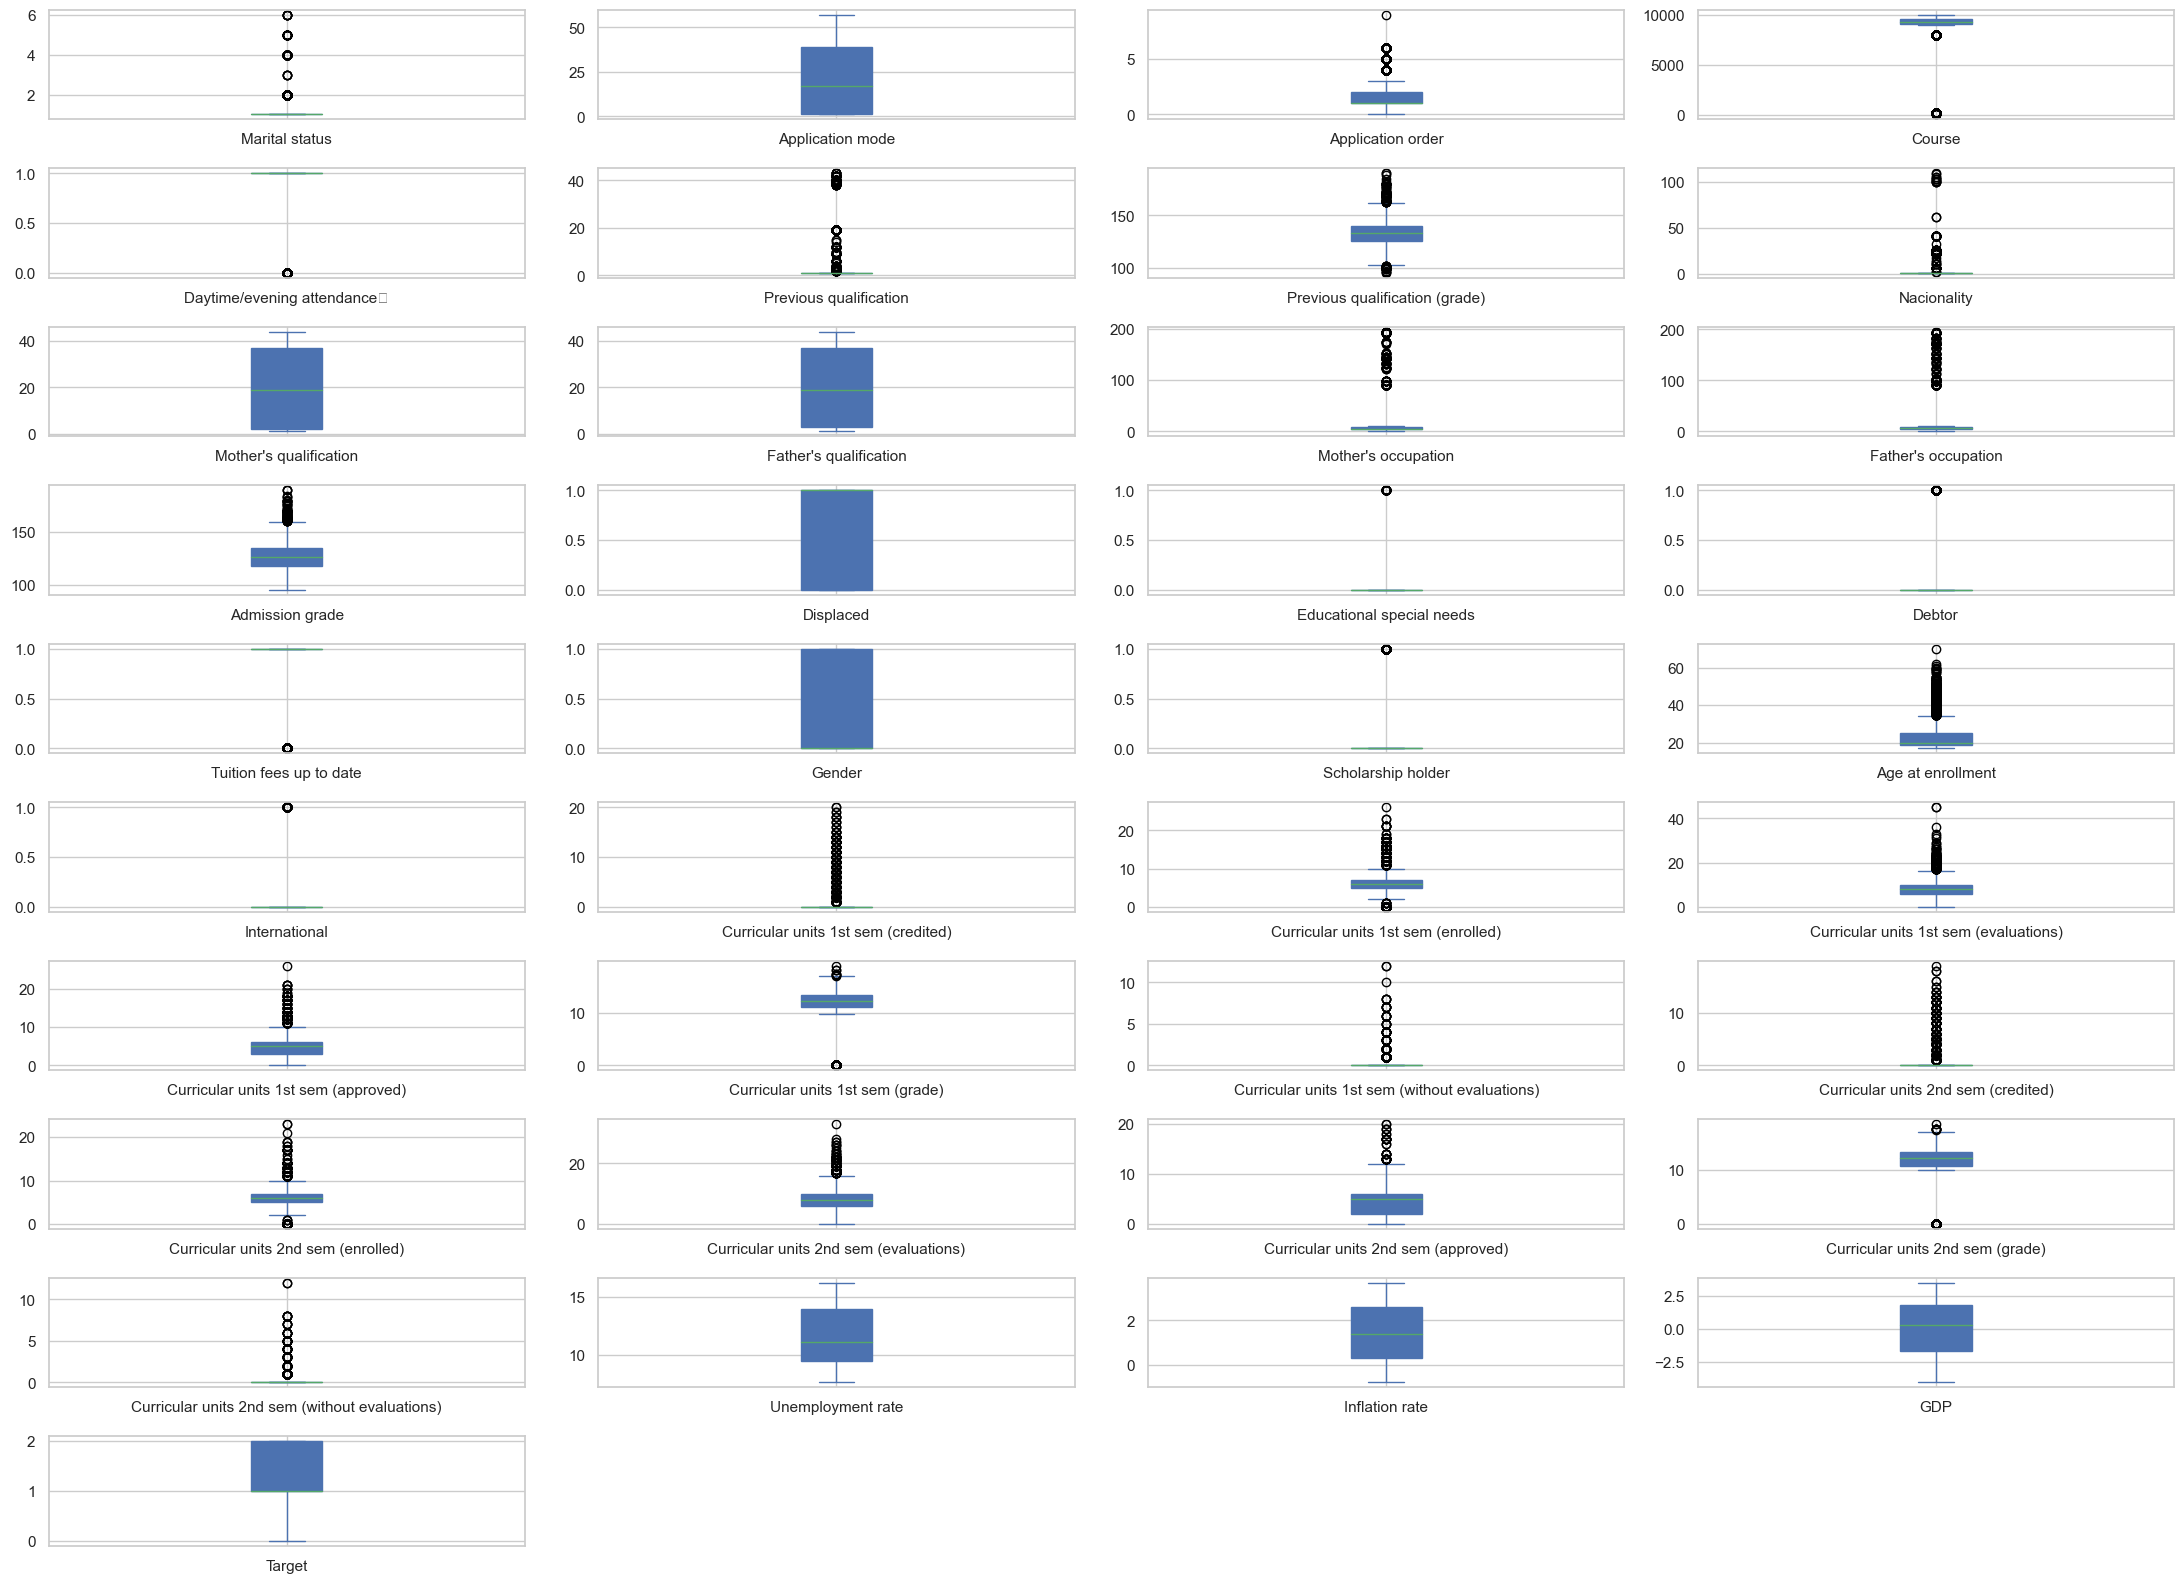

In [49]:
# Box plots for numerical variables
plt.figure(figsize=(18, 12))
data[numerical_columns].plot(kind='box', subplots=True, layout=(10, 4), figsize=(22, 16), patch_artist=True)
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'df' with the actual variable name holding your dataset

# List of columns
columns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 
           'Previous qualification', 'Previous qualification (grade)', 'Nacionality', 
           "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 
           'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 
           'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 
           'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
           'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
           'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 
           'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 
           'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 
           'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 
           'Unemployment rate', 'Inflation rate', 'GDP', 'Target']

# Loop through each column and print distinct values and their counts
for column in columns:
    if column in data.columns:
        print(f"Distinct values and counts in {column}:")
        print(data[column].value_counts())  # Print the distinct values along with their counts
        print("\n")  # For better formatting
    else:
        print(f"Column '{column}' not found in DataFrame.\n")


Distinct values and counts in Marital status:
1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital status, dtype: int64


Distinct values and counts in Application mode:
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: Application mode, dtype: int64


Distinct values and counts in Application order:
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: Application order, dtype: int64


Distinct values and counts in Course:
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64


Distinct values and counts in Daytime/evening attendance	:
1    3941
0     483
Name: Daytime/evening attendance\t, dtype: int64


Di

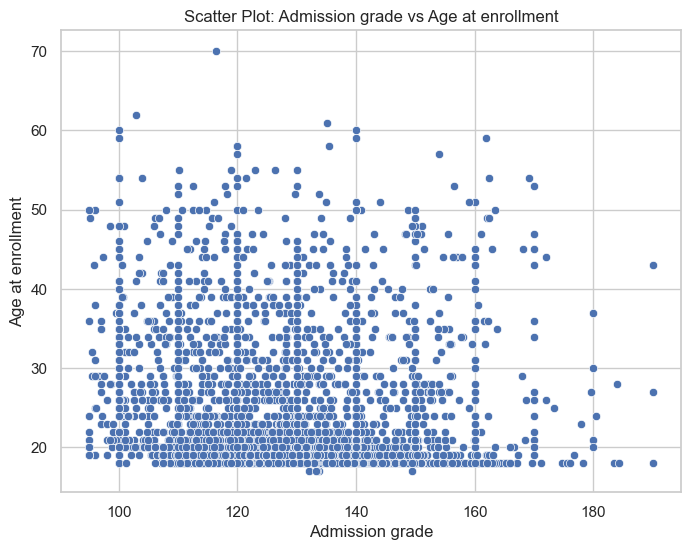

In [51]:

# Scatter plot of two numerical variables, e.g., 'Admission grade' and 'Age at enrollment'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Admission grade', y='Age at enrollment', data=data)
plt.title('Scatter Plot: Admission grade vs Age at enrollment')
plt.xlabel('Admission grade')
plt.ylabel('Age at enrollment')
plt.grid(True)
plt.show()


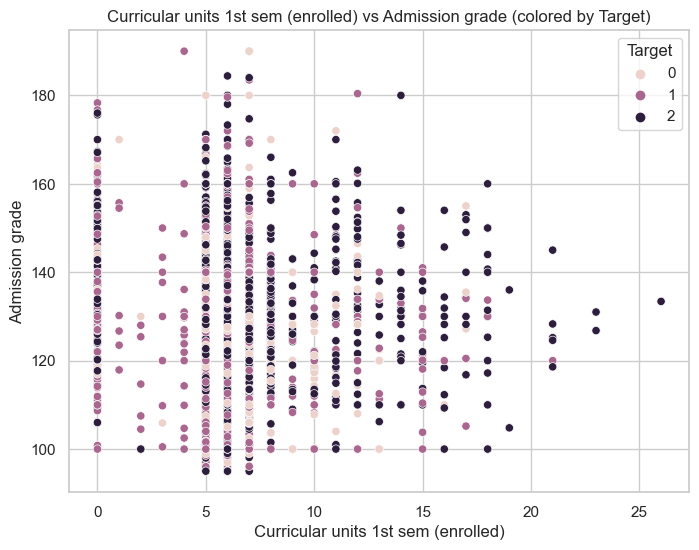

In [52]:
# Scatter plot between 'Curricular units 1st sem (enrolled)' and 'Admission grade'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Curricular units 1st sem (enrolled)', y='Admission grade', hue='Target', data=data)
plt.title('Curricular units 1st sem (enrolled) vs Admission grade (colored by Target)')
plt.xlabel('Curricular units 1st sem (enrolled)')
plt.ylabel('Admission grade')
plt.grid(True)
plt.show()

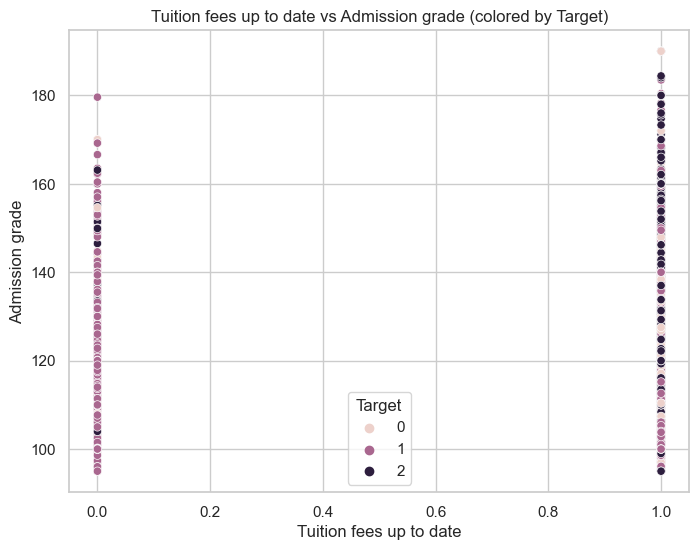

In [53]:
# Scatter plot between 'Tuition fees up to date' and 'Admission grade'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Tuition fees up to date', y='Admission grade', hue='Target', data=data)
plt.title('Tuition fees up to date vs Admission grade (colored by Target)')
plt.xlabel('Tuition fees up to date')
plt.ylabel('Admission grade')
plt.grid(True)
plt.show()

### we can see from here that most people that cant pay their fee tend to dropout

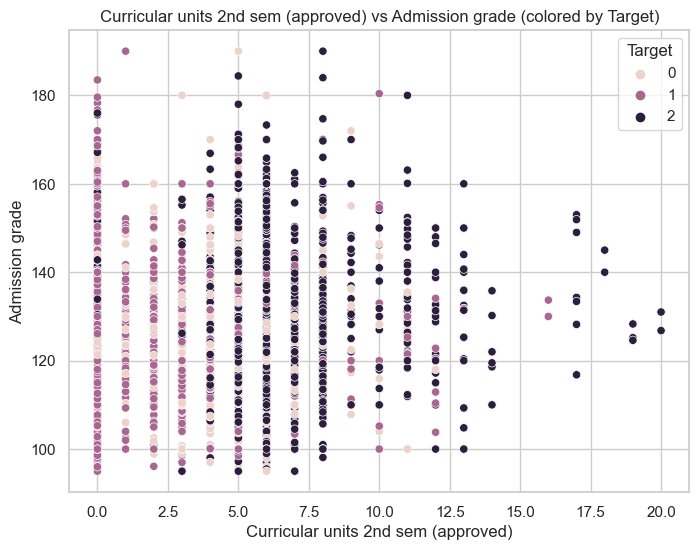

In [54]:
# Scatter plot between 'Curricular units 2nd sem (approved)' and 'Admission grade'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Curricular units 2nd sem (approved)', y='Admission grade', hue='Target', data=data)
plt.title('Curricular units 2nd sem (approved) vs Admission grade (colored by Target)')
plt.xlabel('Curricular units 2nd sem (approved)')
plt.ylabel('Admission grade')
plt.grid(True)
plt.show()

### Also student went lower grade tend to drop out 

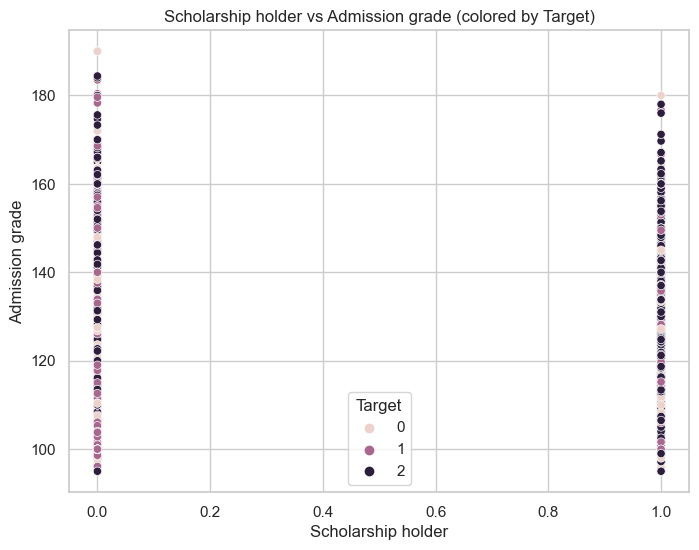

In [55]:
# Scatter plot between 'Scholarship holder' and 'Admission grade'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Scholarship holder', y='Admission grade', hue='Target', data=data)
plt.title('Scholarship holder vs Admission grade (colored by Target)')
plt.xlabel('Scholarship holder')
plt.ylabel('Admission grade')
plt.grid(True)
plt.show()

### wow most scholarship holder are really low to droping out 

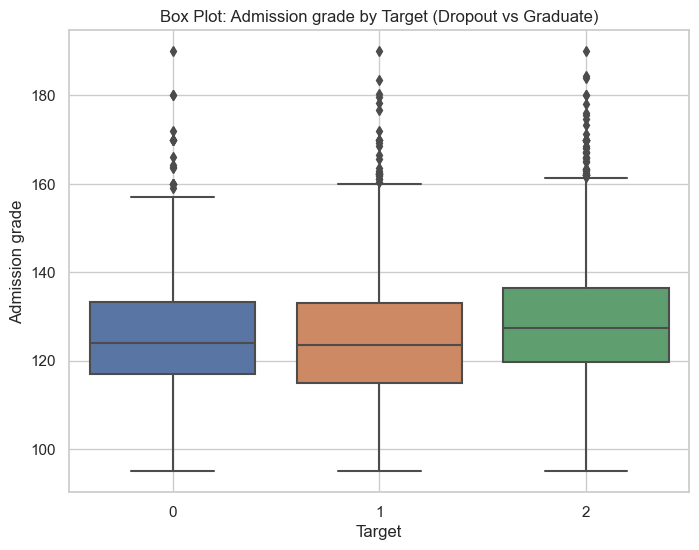

In [56]:
# Box plot of a numerical variable (e.g., 'Admission grade') grouped by a categorical variable (e.g., 'Target')
plt.figure(figsize=(8, 6))
sns.boxplot(x='Target', y='Admission grade', data=data)
plt.title('Box Plot: Admission grade by Target (Dropout vs Graduate)')
plt.xlabel('Target')
plt.ylabel('Admission grade')
plt.grid(True)
plt.show()


In [57]:
from scipy.stats import chi2_contingency

# Create a contingency table for 'Marital status' and 'Target'
contingency_table = pd.crosstab(data['Marital status'], data['Target'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square test statistic: {chi2}')
print(f'P-value: {p}')


Chi-square test statistic: 63.43854947026341
P-value: 8.054279703889306e-10


In [58]:
# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [59]:
# !pip install plotly kaleido


In [60]:
# pip install -U kaleido

In [61]:
!pip install --upgrade nbformat


  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/a9/82/0340caa499416c78e5d8f5f05947ae4bc3cba53c9f038ab6e9ed964e22f1/nbformat-5.10.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   --------------- ------------------------ 30.7/78.5 kB 660.6 kB/s eta 0:00:01
   --------------- ------------------------ 30.7/78.5 kB 660.6 kB/s eta 0:00:01
   --------------- ------------------------ 30.7/78.5 kB 660.6 kB/s eta 0:00:01
   --------------- ------------------------ 30.7/78.5 kB 660.6 kB/s eta 0:00:01
   --------------- ------------------------ 30.7/78.5 kB 660.6 kB/s eta 0:00:01
   ------------------------------------ --- 71.7/78.5 kB 157.1 kB/s eta 0:00:01
   ---------------------------------------- 78.5/78.5 kB 145.4 kB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.7.0
    Uninstalling nbformat-5.7.0:
      Successfully uninstalled nbformat-5.7.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.10.4 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [62]:
# Distribution of Target feature
fig = px.pie(values=data['Target'].value_counts(),
             names=data['Target'].value_counts().index.to_list())

fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker=dict(colors=['teal', 'goldenrod', 'slateblue']))

fig.update_layout(showlegend=False, height=400, width=800,
                  title='Distribution of Target')

# Save the figure
fig.write_image('fig.svg', engine='kaleido')

# Display the figure
fig.show()


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [70]:
import plotly.express as px
import pandas as pd

# Load the dataset with the correct delimiter
data = pd.read_csv('data.csv', sep=';')

# Create the histogram for 'Age at enrollment' colored by 'Target'
fig = px.histogram(data, x='Age at enrollment', color='Target',
                   opacity=0.75, barmode='overlay',
                   width=800, height=500, color_discrete_sequence=px.colors.qualitative.G10)

# Update the layout with a title
fig.update_layout(title='Age distribution of students')

# Show the plot
fig.show()

# # Save the figure as an SVG file (after verifying Kaleido installation)
# fig.write_image('fig.svg', engine='kaleido')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed